In [223]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt   
import seaborn as sns  

In [224]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [225]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [226]:
data.shape


(41188, 21)

In [227]:
data.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [229]:
adj_data = data.drop(["contact","month","day_of_week","duration", "campaign",	"pdays","previous",	"poutcome","emp.var.rate"], axis = 1, inplace= True)
print(adj_data)

None


In [230]:
data


,age,job,marital,education,default,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,94.767,-50.8,1.028,4963.6,yes


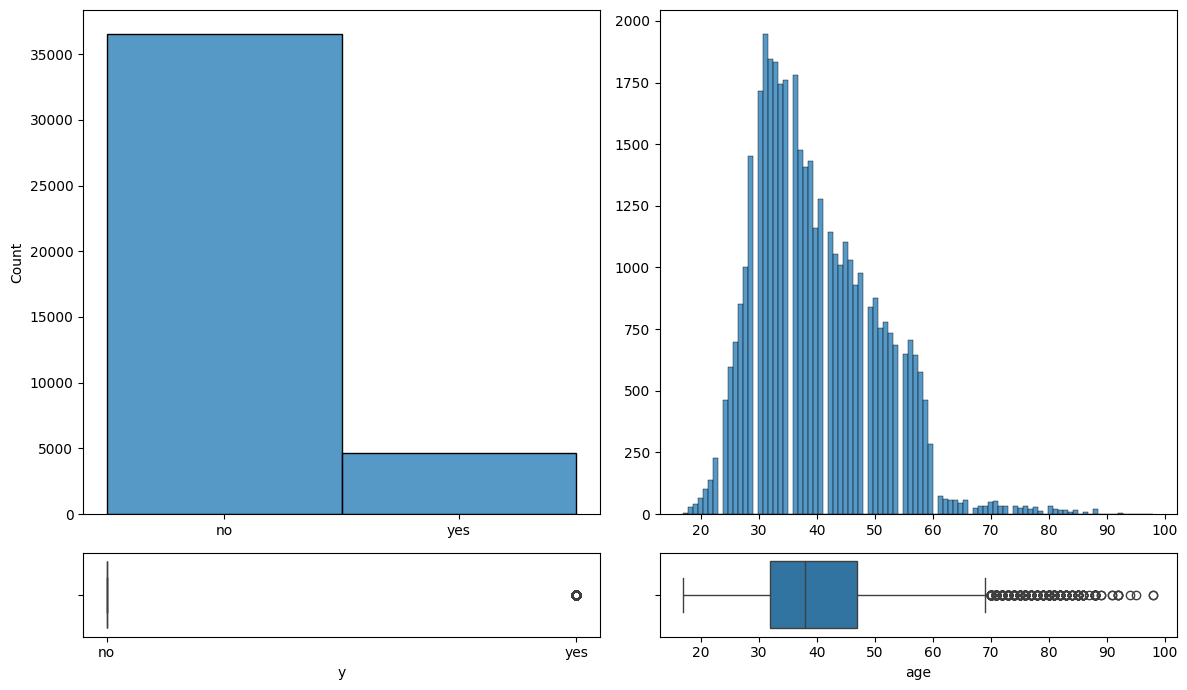

In [231]:
fig, axis = plt.subplots(2, 2, figsize = (12, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "y").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "y")
sns.histplot(ax = axis[0, 1], data = data, x = "age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "age")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [232]:
pd.get_dummies(data['age']).sum()

17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Length: 78, dtype: int64

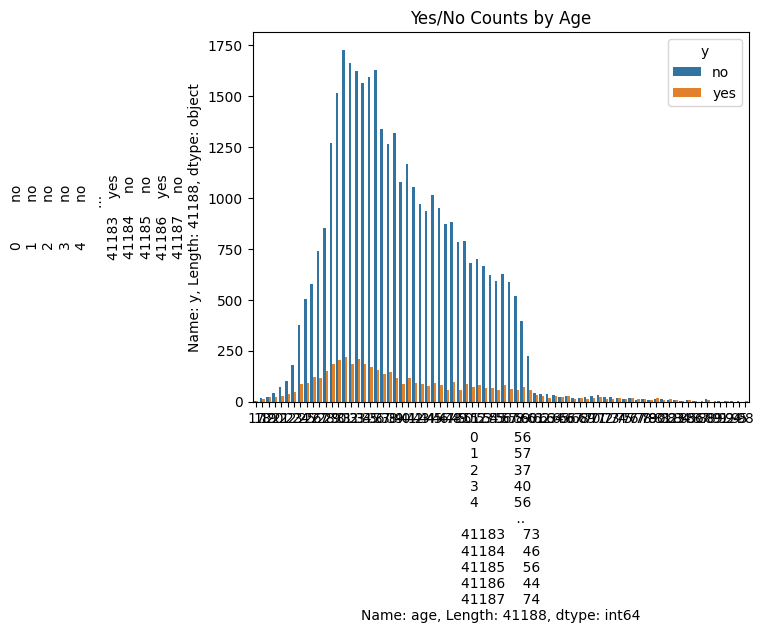

In [233]:



# Create a countplot using seaborn
sns.countplot(x='age', hue='y', data=data)

# Customize the plot (optional)
plt.title('Yes/No Counts by Age')
plt.xlabel(data['age'])
plt.ylabel(data['y'])
plt.legend(title='y')
plt.show()

In [234]:
pd.get_dummies(data['job']).sum()

admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64

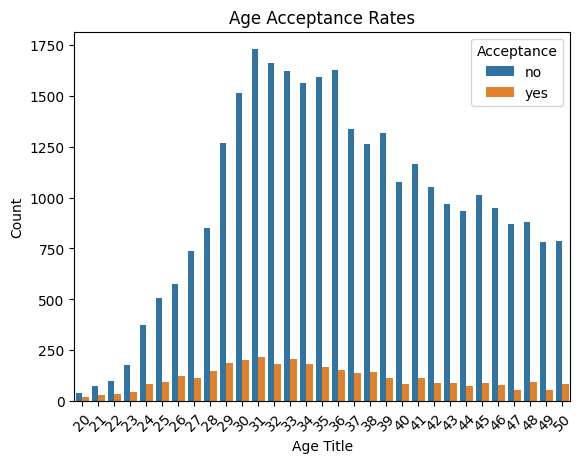

In [235]:
# Group by job and acceptance, then count occurrences
age_filtered = data[data['age'].between(20,50)]
grouped_df = age_filtered.groupby(['age', 'y']).size().reset_index(name='count')

# Create the bar plot using seaborn
sns.barplot(x='age', y='count', hue='y', data=grouped_df)

# Customize the plot
plt.title('Age Acceptance Rates')
plt.xlabel('Age Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

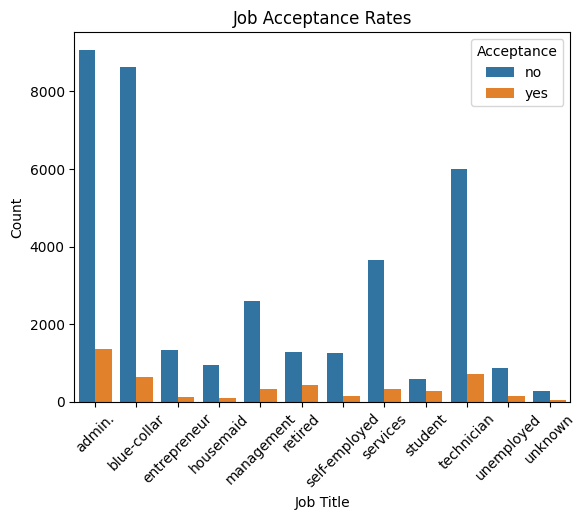

In [236]:


# Group by job and acceptance, then count occurrences
grouped_df = data.groupby(['job', 'y']).size().reset_index(name='count')

# Create the bar plot using seaborn
sns.barplot(x='job', y='count', hue='y', data=grouped_df)

# Customize the plot
plt.title('Job Acceptance Rates')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [237]:
pd.get_dummies(data['education']).sum()

basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64

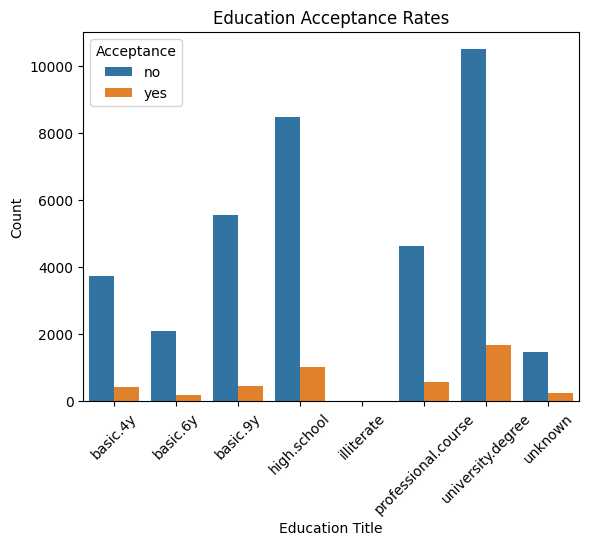

In [238]:

# Group by job and acceptance, then count occurrences
grouped_df = data.groupby(['education', 'y']).size().reset_index(name='count')

# Create the bar plot using seaborn
sns.barplot(x='education', y='count', hue='y', data=grouped_df)

# Customize the plot
plt.title('Education Acceptance Rates')
plt.xlabel('Education Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [239]:
pd.get_dummies(data['default']).sum()

no         32588
unknown     8597
yes            3
dtype: int64

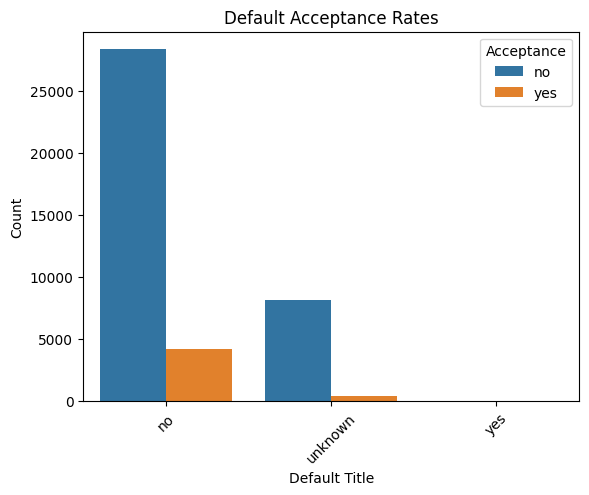

In [240]:
grouped_df = data.groupby(['default','y']).size().reset_index(name='count')

sns.barplot(x='default', y='count', hue='y', data=grouped_df)

plt.title('Default Acceptance Rates')
plt.xlabel('Default Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [241]:
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [242]:
pd.get_dummies(data['marital']).sum()

divorced     4612
married     24928
single      11568
unknown        80
dtype: int64

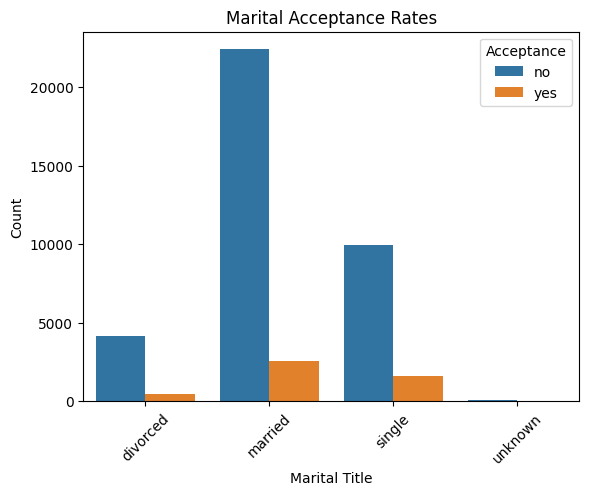

In [243]:
grouped_df = data.groupby(['marital','y']).size().reset_index(name='count')

sns.barplot(x='marital', y='count', hue='y', data=grouped_df)

plt.title('Marital Acceptance Rates')
plt.xlabel('Marital Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [244]:
pd.get_dummies(data['housing']).sum()

no         18622
unknown      990
yes        21576
dtype: int64

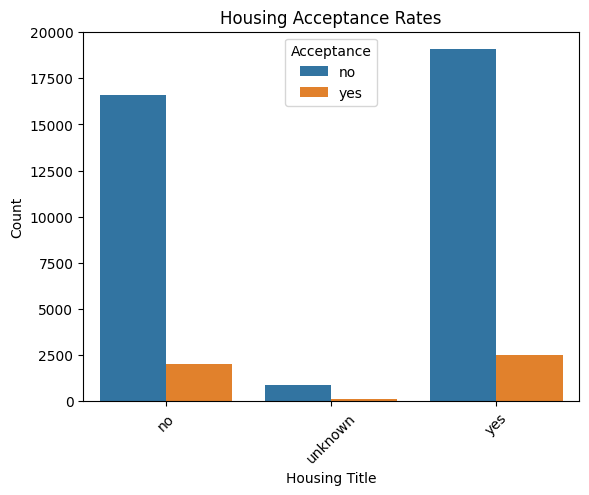

In [245]:
grouped_df = data.groupby(['housing','y']).size().reset_index(name='count')

sns.barplot(x='housing', y='count', hue='y', data=grouped_df)

plt.title('Housing Acceptance Rates')
plt.xlabel('Housing Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [246]:
pd.get_dummies(data['loan']).sum()

no         33950
unknown      990
yes         6248
dtype: int64

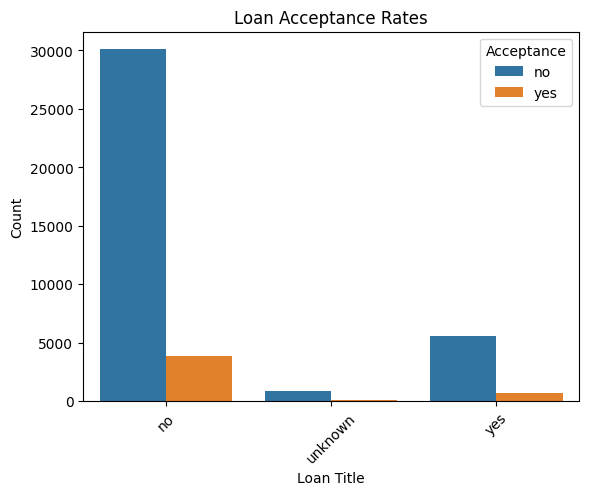

In [247]:
grouped_df = data.groupby(['loan','y']).size().reset_index(name='count')

sns.barplot(x='loan', y='count', hue='y', data=grouped_df)

plt.title('Loan Acceptance Rates')
plt.xlabel('Loan Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [248]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [249]:
pd.get_dummies(data['cons.price.idx']).sum()

92.201     770
92.379     267
92.431     447
92.469     178
92.649     357
92.713     172
92.756      10
92.843     282
92.893    5794
92.963     715
93.075    2458
93.200    3616
93.369     264
93.444    5175
93.749     174
93.798      67
93.876     212
93.918    6685
93.994    7763
94.027     233
94.055     229
94.199     303
94.215     311
94.465    4374
94.601     204
94.767     128
dtype: int64

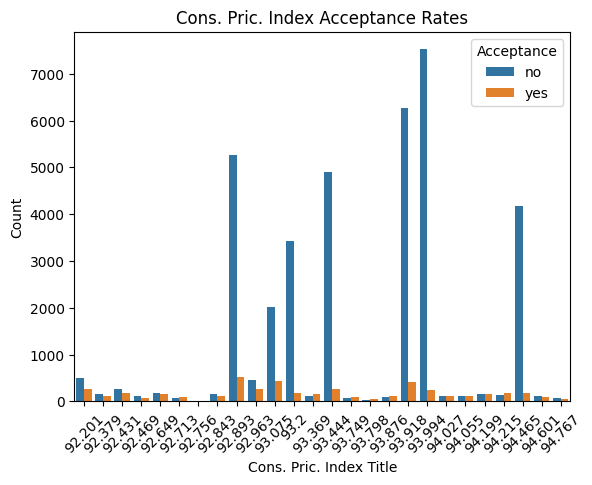

In [250]:
grouped_df = data.groupby(['cons.price.idx','y']).size().reset_index(name='count')

sns.barplot(x='cons.price.idx', y='count', hue='y', data=grouped_df)

plt.title('Cons. Pric. Index Acceptance Rates')
plt.xlabel('Cons. Pric. Index Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [251]:
pd.get_dummies(data['cons.conf.idx']).sum()

-50.8     128
-50.0     282
-49.5     204
-47.1    2458
-46.2    5794
-45.9      10
-42.7    6685
-42.0    3616
-41.8    4374
-40.8     715
-40.4      67
-40.3     311
-40.0     212
-39.8     229
-38.3     233
-37.5     303
-36.4    7763
-36.1    5175
-34.8     264
-34.6     174
-33.6     178
-33.0     172
-31.4     770
-30.1     357
-29.8     267
-26.9     447
dtype: int64

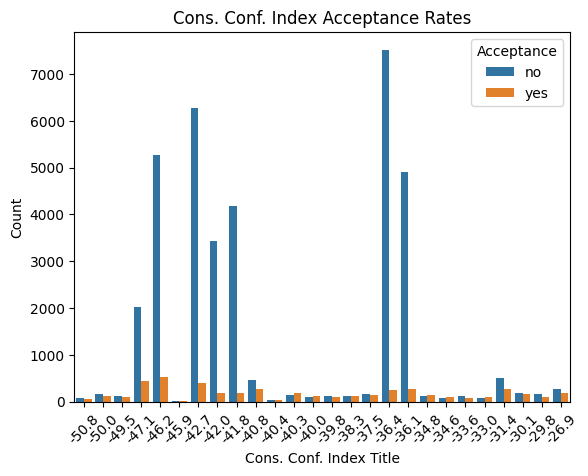

In [252]:
grouped_df = data.groupby(['cons.conf.idx','y']).size().reset_index(name='count')

sns.barplot(x='cons.conf.idx', y='count', hue='y', data=grouped_df)

plt.title('Cons. Conf. Index Acceptance Rates')
plt.xlabel('Cons. Conf. Index Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

In [253]:
pd.get_dummies(data['euribor3m']).sum()


0.634      8
0.635     43
0.636     14
0.637      6
0.638      7
        ... 
4.967    643
4.968    992
4.970    172
5.000      7
5.045      9
Length: 316, dtype: int64

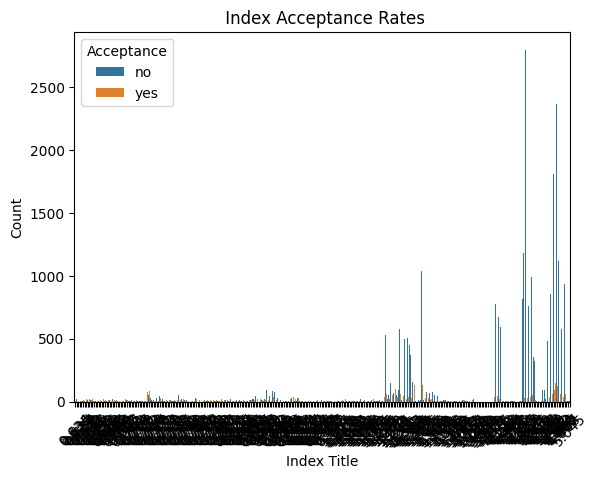

In [254]:
grouped_df = data.groupby(['euribor3m','y']).size().reset_index(name='count')

sns.barplot(x='euribor3m', y='count', hue='y', data=grouped_df)

plt.title(' Index Acceptance Rates')
plt.xlabel('Index Title')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Acceptance')
plt.show()

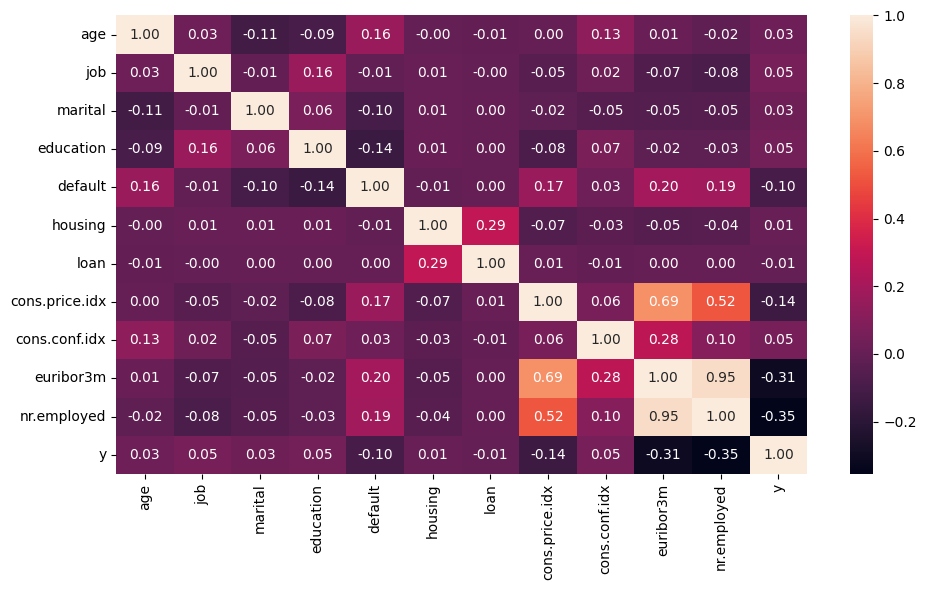

In [255]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Factorize the categorical columns  
data["y"] = pd.factorize(data["y"])[0]  
data["job"] = pd.factorize(data["job"])[0]  
data["marital"] = pd.factorize(data["marital"])[0]  
data["education"] = pd.factorize(data["education"])[0]  
data["default"] = pd.factorize(data["default"])[0]  
data["housing"] = pd.factorize(data["housing"])[0]  
data["loan"] = pd.factorize(data["loan"])[0]  

# Create the heatmap  
fig, axis = plt.subplots(figsize=(10, 6))  
sns.heatmap(data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].corr(), annot=True, fmt=".2f")  

plt.tight_layout()  
plt.show()

In [256]:
from sklearn.model_selection import train_test_split

num_variables = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# We divide the dataset into training and test samples
X = data.drop("y", axis = 1)[num_variables]
y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,3,0,3,1,1,0,93.918,-42.7,4.960,5228.1
35451,31,2,0,6,0,0,0,92.893,-46.2,1.244,5099.1
30592,59,5,0,0,0,0,0,92.893,-46.2,1.354,5099.1
17914,43,0,2,3,0,1,0,93.918,-42.7,4.961,5228.1
3315,39,2,1,1,1,0,0,93.994,-36.4,4.860,5191.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,age,job,marital,education,default,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,-0.001669,-0.271142,-0.738185,-0.12745,1.948567,0.787712,-0.438945,0.589080,-0.472769,0.771354,0.843165
35451,-0.864095,-0.677848,-0.738185,1.24463,-0.512631,-1.056870,-0.438945,-1.180760,-1.229916,-1.372028,-0.939748
30592,1.819007,0.542271,-0.738185,-1.49953,-0.512631,-1.056870,-0.438945,-1.180760,-1.229916,-1.308581,-0.939748
17914,0.285806,-1.491260,2.126401,-0.12745,-0.512631,0.787712,-0.438945,0.589080,-0.472769,0.771930,0.843165
3315,-0.097494,-0.677848,0.694108,-1.04217,1.948567,-1.056870,-0.438945,0.720307,0.890097,0.713674,0.330405


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,age,job,marital,education,default,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,0.283951,0.272727,0.000000,0.428571,0.5,0.5,0.0,0.669135,0.338912,0.980730,1.000000
35451,0.172840,0.181818,0.000000,0.857143,0.0,0.0,0.0,0.269680,0.192469,0.138291,0.512287
30592,0.518519,0.454545,0.000000,0.000000,0.0,0.0,0.0,0.269680,0.192469,0.163228,0.512287
17914,0.320988,0.000000,0.666667,0.428571,0.0,0.5,0.0,0.669135,0.338912,0.980957,1.000000
3315,0.271605,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.698753,0.602510,0.958059,0.859735


In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,default,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.0,93.918,-42.7,4.960,5228.1
1,0.0,92.893,-46.2,1.244,5099.1
2,0.0,92.893,-46.2,1.354,5099.1
3,0.0,93.918,-42.7,4.961,5228.1
4,1.0,93.994,-36.4,4.860,5191.0


In [214]:
X_test_sel.head()

,default,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,92.893,-46.2,1.299,5099.1
1,1.0,93.994,-36.4,4.860,5191.0
2,0.0,92.893,-46.2,1.313,5099.1
3,0.0,94.465,-41.8,4.967,5228.1
4,0.0,93.918,-42.7,4.963,5228.1


In [215]:
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  

# Load your dataset (replace with the correct path to your dataset)  
# For example, if you have a CSV file:  
# new_data = pd.read_csv("path/to/your/dataset.csv")  
new_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')  # Adjust this line  

# Define features and target  
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',  
            'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'euribor3m']  
target =   'y' 

# Separate predictors from the label  
X = new_data[features]  
y = new_data[target]  

# Handle categorical variables (if necessary)  
X = pd.get_dummies(X, drop_first=True)  

# Divide the sample into train and test at 80%  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)  
print(X_train)
print()

# Scale the data  
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# Create and fit the model  
model = LogisticRegression(max_iter=200)  
model.fit(X_train_scaled, y_train)  

# Check the model's performance  
print("Training score:", model.score(X_train_scaled, y_train))  
print("Testing score:", model.score(X_test_scaled, y_test))

       age  cons.price.idx  cons.conf.idx  nr.employed  euribor3m  \
12556   40          93.918          -42.7       5228.1      4.960   
35451   31          92.893          -46.2       5099.1      1.244   
30592   59          92.893          -46.2       5099.1      1.354   
17914   43          93.918          -42.7       5228.1      4.961   
3315    39          93.994          -36.4       5191.0      4.860   
...    ...             ...            ...          ...        ...   
6265    58          93.994          -36.4       5191.0      4.857   
11284   37          94.465          -41.8       5228.1      4.961   
38158   35          92.431          -26.9       5017.5      0.754   
860     40          93.994          -36.4       5191.0      4.856   
15795   29          93.918          -42.7       5228.1      4.960   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
12556             True             False          False           False   
35451            Fals

In [217]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [219]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

new_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')

X_train = new_data.drop(["y"], axis = 1)
y_train = new_data["y"]
X_test = new_data.drop(["y"], axis = 1)
y_test = new_data["y"]

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

ValueError: could not convert string to float: 'housemaid'